In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('drive/MyDrive/TA/newera/datatrain - 900.csv')
data

,Comment,ekonomi,emosi,performa,fisik_tampilan,layanan,aspek
0,sejauh ini gua rekomen dari brand spesifikasi ...,1,0,0,0,0,ekonomi
1,500 mah tapi konsumsi tenagannya efisien banget,1,0,0,0,0,ekonomi
2,c11 1200 termasuk murah ga nie,1,0,0,0,0,ekonomi
3,bini gw blm kasih nih ada bbrp gadget nganggur...,1,0,0,0,0,ekonomi
4,dia nak 12 tapi sekarang pun takde bajet nak t...,1,0,0,0,0,ekonomi
...,...,...,...,...,...,...,...
2482,syg max dipake drakoran baterainya awet gak ya,0,0,1,0,0,performa
2483,30 desember 2019 foto pake 3s 2016,0,0,1,0,0,performa
2484,3 kalo suka kamera belakang kalo suka kamera d...,0,0,1,0,0,performa
2485,9 enak buat main genshin jarang lag,0,0,1,0,0,performa


# **adjust 900**

Ekonomi: 336
Fisik tampilan: 244
Emosi: 900
Performa: 917
Layanan: 90


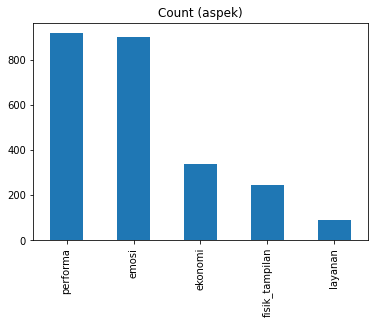

In [ ]:
aspek_count = data.aspek.value_counts()
print('Ekonomi:', aspek_count['ekonomi'])
print('Fisik tampilan:', aspek_count['fisik_tampilan'])
print('Emosi:', aspek_count['emosi'])
print('Performa:', aspek_count['performa'])
print('Layanan:', aspek_count['layanan'])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

aspek_count.plot(kind='bar', title='Count (aspek)');

In [ ]:
# Class count
count_class_eko, count_class_fis, count_class_emo, count_class_per, count_class_lay = aspek_count

# Divide by class
class_eko = data[data['aspek'] == 'ekonomi']
class_fis = data[data['aspek'] == 'fisik_tampilan']
class_emo = data[data['aspek'] == 'emosi']
class_per = data[data['aspek'] == 'performa']
class_lay = data[data['aspek'] == 'layanan']

In [ ]:
aspek_count

performa          917
emosi             900
ekonomi           336
fisik_tampilan    244
layanan            90
Name: aspek, dtype: int64

Random over-sampling:
layanan           900
fisik_tampilan    244
Name: aspek, dtype: int64


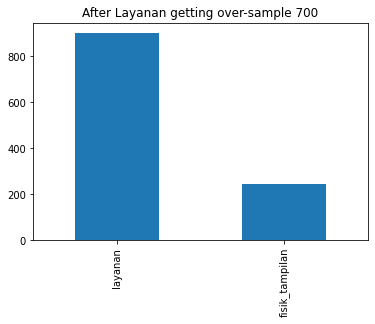

In [ ]:
class_lay_over = class_lay.sample(count_class_fis, replace=True)
result_lay_over = pd.concat([class_fis, class_lay_over], axis=0)

print('Random over-sampling:')
print(result_lay_over.aspek.value_counts())

result_lay_over.aspek.value_counts().plot(kind='bar', title='After Layanan getting over-sample 700');

In [ ]:
layover_count = result_lay_over.aspek.value_counts()
class_layover_count, class_fis_count = layover_count
class_layover_count

900

Random over-sampling:
layanan    900
ekonomi    900
Name: aspek, dtype: int64


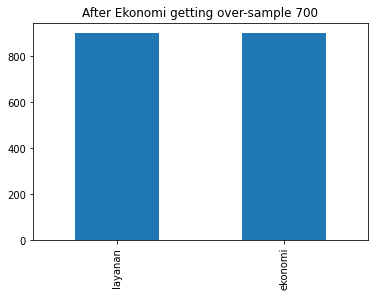

In [ ]:
class_eko_over = class_eko.sample(class_layover_count, replace=True)
result_eko_over = pd.concat([class_lay_over, class_eko_over], axis=0)

print('Random over-sampling:')
print(result_eko_over.aspek.value_counts())

result_eko_over.aspek.value_counts().plot(kind='bar', title='After Ekonomi getting over-sample 700');

Random over-sampling:
fisik_tampilan    900
layanan           900
Name: aspek, dtype: int64


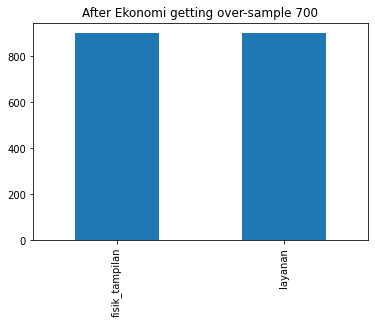

In [ ]:
class_fis_over = class_fis.sample(class_layover_count, replace=True)
result_fis_over = pd.concat([class_lay_over, class_fis_over], axis=0)

print('Random over-sampling:')
print(result_fis_over.aspek.value_counts())

result_fis_over.aspek.value_counts().plot(kind='bar', title='After Ekonomi getting over-sample 700');

Random over-sampling:
layanan     900
performa    900
Name: aspek, dtype: int64


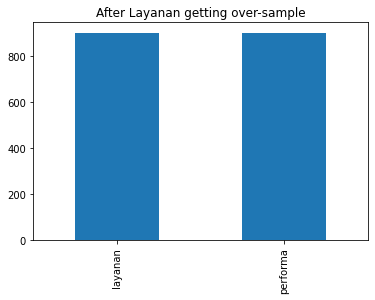

In [ ]:
class_per_under = class_per.sample(class_layover_count, replace=True)
result_per_under = pd.concat([class_lay_over, class_per_under], axis=0)

print('Random over-sampling:')
print(result_per_under.aspek.value_counts())

result_per_under.aspek.value_counts().plot(kind='bar', title='After Layanan getting over-sample');

In [ ]:
pd.DataFrame(class_lay_over).to_csv("drive/MyDrive/TA/newera/900/lay900.csv", index=True)
pd.DataFrame(class_per_under).to_csv("drive/MyDrive/TA/newera/900/per900.csv", index=True)
pd.DataFrame(class_fis_over).to_csv("drive/MyDrive/TA/newera/900/fis900.csv", index=True)
pd.DataFrame(class_eko_over).to_csv("drive/MyDrive/TA/newera/900/eko900.csv", index=True)
pd.DataFrame(class_emo).to_csv("drive/MyDrive/TA/newera/900/emo900.csv", index=True)

# **SENTIMEN**

Negatif: 886
Positif: 1155
Netral: 578


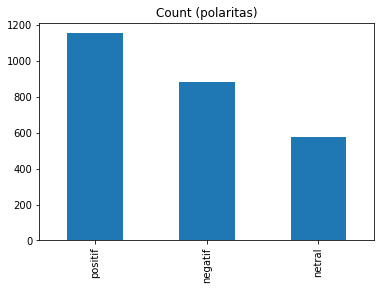

In [ ]:
polaritas_count = data.polaritas.value_counts()
print('Negatif:', polaritas_count['negatif'])
print('Positif:', polaritas_count['positif'])
print('Netral:', polaritas_count['netral'])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

polaritas_count.plot(kind='bar', title='Count (polaritas)');

In [ ]:
# Class count
count_class_neg, count_class_pos, count_class_net = polaritas_count

# Divide by class
class_neg = data[data['polaritas'] == 'negatif']
class_pos = data[data['polaritas'] == 'positif']
class_net = data[data['polaritas'] == 'netral']

In [ ]:
polaritas_count

positif    1155
negatif     886
netral      578
Name: polaritas, dtype: int64

Random over-sampling:
netral     1155
negatif     886
Name: polaritas, dtype: int64


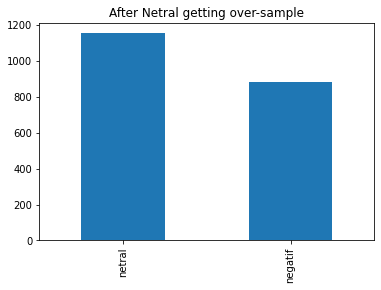

In [ ]:
class_net_over = class_net.sample(count_class_neg, replace=True)
result_net_over = pd.concat([class_neg, class_net_over], axis=0)

print('Random over-sampling:')
print(result_net_over.polaritas.value_counts())

result_net_over.polaritas.value_counts().plot(kind='bar', title='After Netral getting over-sample');

In [ ]:
netover_count = result_net_over.polaritas.value_counts()
class_netover_count, class_neg_count = netover_count
class_netover_count

1155

Random over-sampling:
netral     1155
negatif    1155
Name: polaritas, dtype: int64


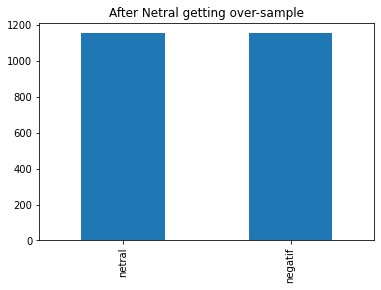

In [ ]:
class_neg_over = class_neg.sample(class_netover_count, replace=True)
result_neg_over = pd.concat([class_net_over, class_neg_over], axis=0)

print('Random over-sampling:')
print(result_neg_over.polaritas.value_counts())

result_neg_over.polaritas.value_counts().plot(kind='bar', title='After Netral getting over-sample');

In [ ]:
pd.DataFrame(class_net_over).to_csv("drive/MyDrive/TA/newera/sentimen/netral.csv", index=True)
pd.DataFrame(class_neg_over).to_csv("drive/MyDrive/TA/newera/sentimen/negatif.csv", index=True)
pd.DataFrame(class_pos).to_csv("drive/MyDrive/TA/newera/sentimen/positif.csv", index=True)

# **OVERSAMPLING MAX**

In [ ]:
data1 = pd.read_csv('drive/MyDrive/TA/newera/datatrain.csv')
data1

,Unnamed: 0,Comment,negatif,netral,positif,ekonomi,emosi,performa,fisik_tampilan,layanan,polaritas,aspek
0,346,iya kak kan bilang pake teropong hpnya juga ha...,0,0,1,0,0,1,0,0,positif,performa
1,1482,iya emang keren banget ini paling kurang kamer...,0,0,1,0,0,1,0,0,positif,performa
2,2563,sayang deh kalo buat 6s mendingan si menurutku,0,1,0,0,1,0,0,0,netral,emosi
3,163,baru bbrp bulan dah,1,0,0,0,1,0,0,0,negatif,emosi
4,1490,nyobain x3 seger bet memory 256gb wkwkwk,0,0,1,0,0,1,0,0,positif,performa
...,...,...,...,...,...,...,...,...,...,...,...,...
2614,1646,baterainya awet murah juga,0,0,1,1,0,0,0,0,positif,ekonomi
2615,1859,iya mamaku sumsang anaknya semua gpp,0,1,0,0,1,0,0,0,netral,emosi
2616,1279,emang dabes lah bismillah f10,0,0,1,0,1,0,0,0,positif,emosi
2617,1250,5g murah baru a74 5g ama 5g saran aja kalau ka...,0,1,0,1,0,0,0,0,netral,ekonomi


Ekonomi: 336
Fisik tampilan: 244
Emosi: 1032
Performa: 917
Layanan: 90


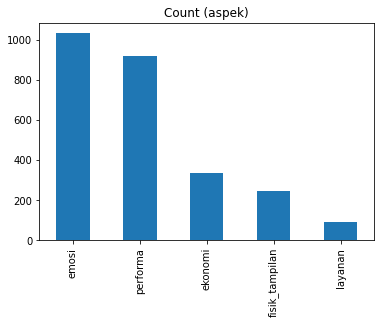

In [ ]:
aspek1_count = data1.aspek.value_counts()
print('Ekonomi:', aspek1_count['ekonomi'])
print('Fisik tampilan:', aspek1_count['fisik_tampilan'])
print('Emosi:', aspek1_count['emosi'])
print('Performa:', aspek1_count['performa'])
print('Layanan:', aspek1_count['layanan'])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

aspek1_count.plot(kind='bar', title='Count (aspek)');

In [ ]:
# Class count
count_class_eko1, count_class_fis1, count_class_emo1, count_class_per1, count_class_lay1 = aspek1_count

# Divide by class
class_eko1 = data1[data1['aspek'] == 'ekonomi']
class_fis1 = data1[data1['aspek'] == 'fisik_tampilan']
class_emo1 = data1[data1['aspek'] == 'emosi']
class_per1 = data1[data1['aspek'] == 'performa']
class_lay1 = data1[data1['aspek'] == 'layanan']

Random over-sampling:
layanan    1032
ekonomi     336
Name: aspek, dtype: int64


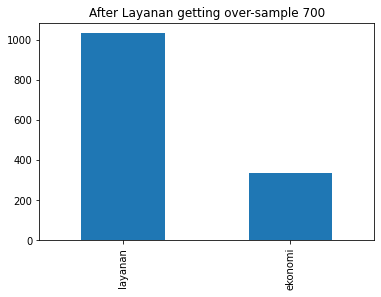

In [ ]:
class_lay1_over = class_lay1.sample(count_class_eko1, replace=True)
result_lay1_over = pd.concat([class_eko1, class_lay1_over], axis=0)

print('Random over-sampling:')
print(result_lay1_over.aspek.value_counts())

result_lay1_over.aspek.value_counts().plot(kind='bar', title='After Layanan getting over-sample 700');

In [ ]:
layover1_count = result_lay1_over.aspek.value_counts()
class_layover1_count, class_fis2_count = layover1_count
class_layover1_count

1032

Random over-sampling:
fisik_tampilan    1032
layanan           1032
Name: aspek, dtype: int64


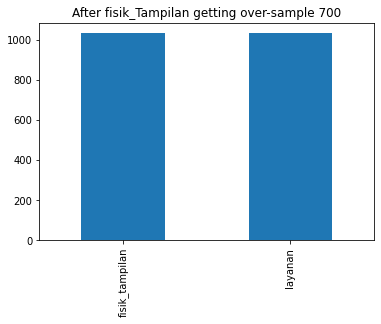

In [ ]:
class_fis1_over = class_fis1.sample(class_layover1_count, replace=True)
result_fis1_over = pd.concat([class_lay1_over, class_fis1_over], axis=0)

print('Random over-sampling:')
print(result_fis1_over.aspek.value_counts())

result_fis1_over.aspek.value_counts().plot(kind='bar', title='After fisik_Tampilan getting over-sample 700');

Random over-sampling:
ekonomi    1032
layanan    1032
Name: aspek, dtype: int64


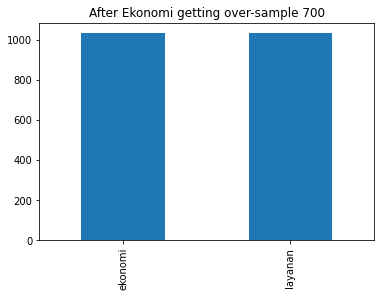

In [ ]:
class_eko1_over = class_eko1.sample(class_layover1_count, replace=True)
result_eko1_over = pd.concat([class_lay1_over, class_eko1_over], axis=0)

print('Random over-sampling:')
print(result_eko1_over.aspek.value_counts())

result_eko1_over.aspek.value_counts().plot(kind='bar', title='After Ekonomi getting over-sample 700');

Random over-sampling:
performa    1032
layanan     1032
Name: aspek, dtype: int64


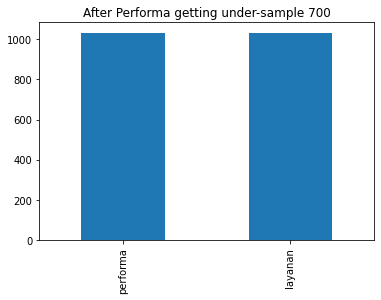

In [ ]:
class_per1_under = class_per1.sample(class_layover1_count, replace=True)
result_per1_under = pd.concat([class_lay1_over, class_per1_under], axis=0)

print('Random over-sampling:')
print(result_per1_under.aspek.value_counts())

result_per1_under.aspek.value_counts().plot(kind='bar', title='After Performa getting under-sample 700');

In [ ]:
pd.DataFrame(class_lay1_over).to_csv("drive/MyDrive/TA/newera/aspekmax/lay1000.csv", index=True)
pd.DataFrame(class_eko1_over).to_csv("drive/MyDrive/TA/newera/aspekmax/eko1000.csv", index=True)
pd.DataFrame(class_fis1_over).to_csv("drive/MyDrive/TA/newera/aspekmax/fis1000.csv", index=True)
pd.DataFrame(class_per1_under).to_csv("drive/MyDrive/TA/newera/aspekmax/per1000.csv", index=True)
pd.DataFrame(class_emo1).to_csv("drive/MyDrive/TA/newera/aspekmax/emo1000.csv", index=True)

In [ ]:
class_per1_under

,Unnamed: 0,Comment,negatif,netral,positif,ekonomi,emosi,performa,fisik_tampilan,layanan,polaritas,aspek
465,225,min saya kok kyk ada bunyi mesinnya kedengeran...,1,0,0,0,0,1,0,0,negatif,performa
380,1708,jiahahahahaha gua juga gada tp ada namanya app...,0,0,1,0,0,1,0,0,positif,performa
1963,2796,tp kalo dalam ruangancahaya ga memadai kamera ...,1,0,0,0,0,1,0,0,negatif,performa
619,2035,sch 9 atau a12 lebih bagus dibeli ya untuk sek...,0,1,0,0,0,1,0,0,netral,performa
1123,371,hsjshsjshshs pastu dah memang nak angkat tu ka...,1,0,0,0,0,1,0,0,negatif,performa
...,...,...,...,...,...,...,...,...,...,...,...,...
2107,254,gua pindah dari 6 ke karena op6 gua matot kwkw...,0,0,1,0,0,1,0,0,positif,performa
843,240,naksirnya coming soon nawarnya belinya pixel s...,0,0,1,0,0,1,0,0,positif,performa
1308,433,kapan nih update miui soalnya miui 1202 banyak...,1,0,0,0,0,1,0,0,negatif,performa
1072,1174,min fitur pengelolaan jaringan untuk matikan p...,1,0,0,0,0,1,0,0,negatif,performa


# **MERGE**

In [ ]:
import os, glob
import pandas as pd

In [ ]:
path ="drive/MyDrive/TA/newera/900"

In [ ]:
all_files = glob.glob(os.path.join(path, "*.csv"))

In [ ]:
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "drive/MyDrive/TA/newera/ovrs900.csv", index=False)